# Goal: Using Boston Housing Dataset, predict the Median Value of Occupied Homes

In [188]:
import pandas as pd
import numpy as np

In [189]:
# Import Dataset

df = pd.read_csv("Boston.csv")
df.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [190]:
# Getting shape of dataset

df.shape

(506, 15)

In [191]:
# Checking null values

df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [192]:
# Removing Duplicates (if any)

df = df.drop_duplicates()

In [196]:
# Getting all Relevant Feature Columns

X = df.loc[:, (df.columns != 'medv') & (df.columns != 'Unnamed: 0') & (df.columns != 'chas')]
X.head(5)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [197]:
# Extracting Desired Column to be Predicted

y = df['medv']
y.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [233]:
# Preprocessing Data 

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Normalizer

# Minmax Scaling
X_processed = pd.DataFrame(minmax_scale(X), columns=X.columns)

# Normalizing values in all Feature Columns
X_processed = pd.DataFrame(Normalizer().fit(X_processed).transform(X_processed), columns=X_processed.columns)

C:\Users\Lenovo\anaconda3\envs\sparta\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


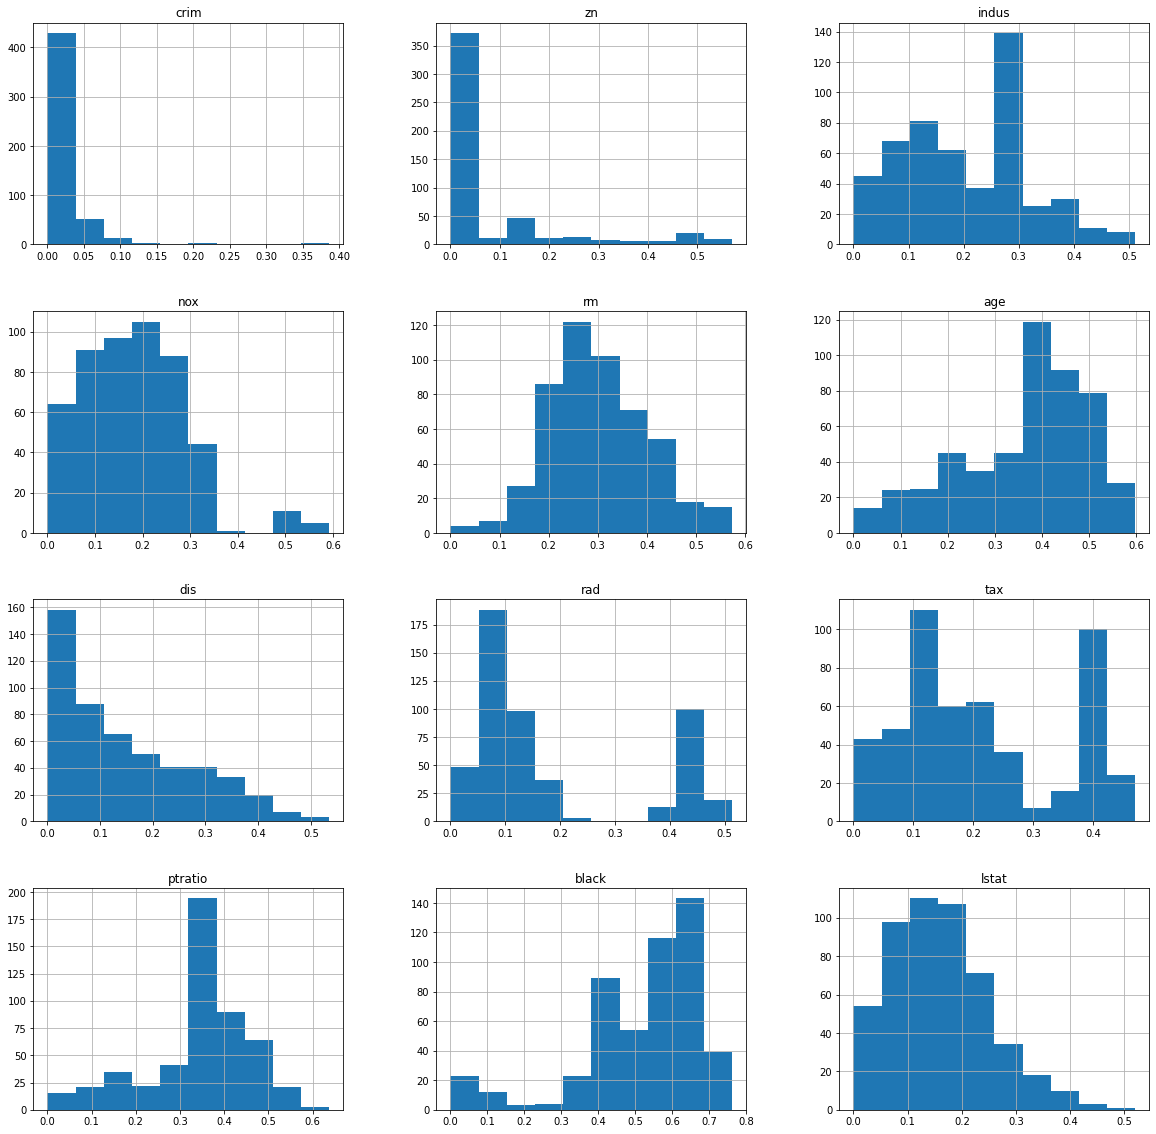

In [216]:
# Checking Distribution of Features

import matplotlib.pyplot as plt   

%matplotlib inline

X_processed.hist(figsize=(20,20))
plt.show()

In [235]:
# Transforming Values (Improve Distribution)

from sklearn.preprocessing import PowerTransformer

X_processed = pd.DataFrame(PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(X_processed))

C:\Users\Lenovo\anaconda3\envs\sparta\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


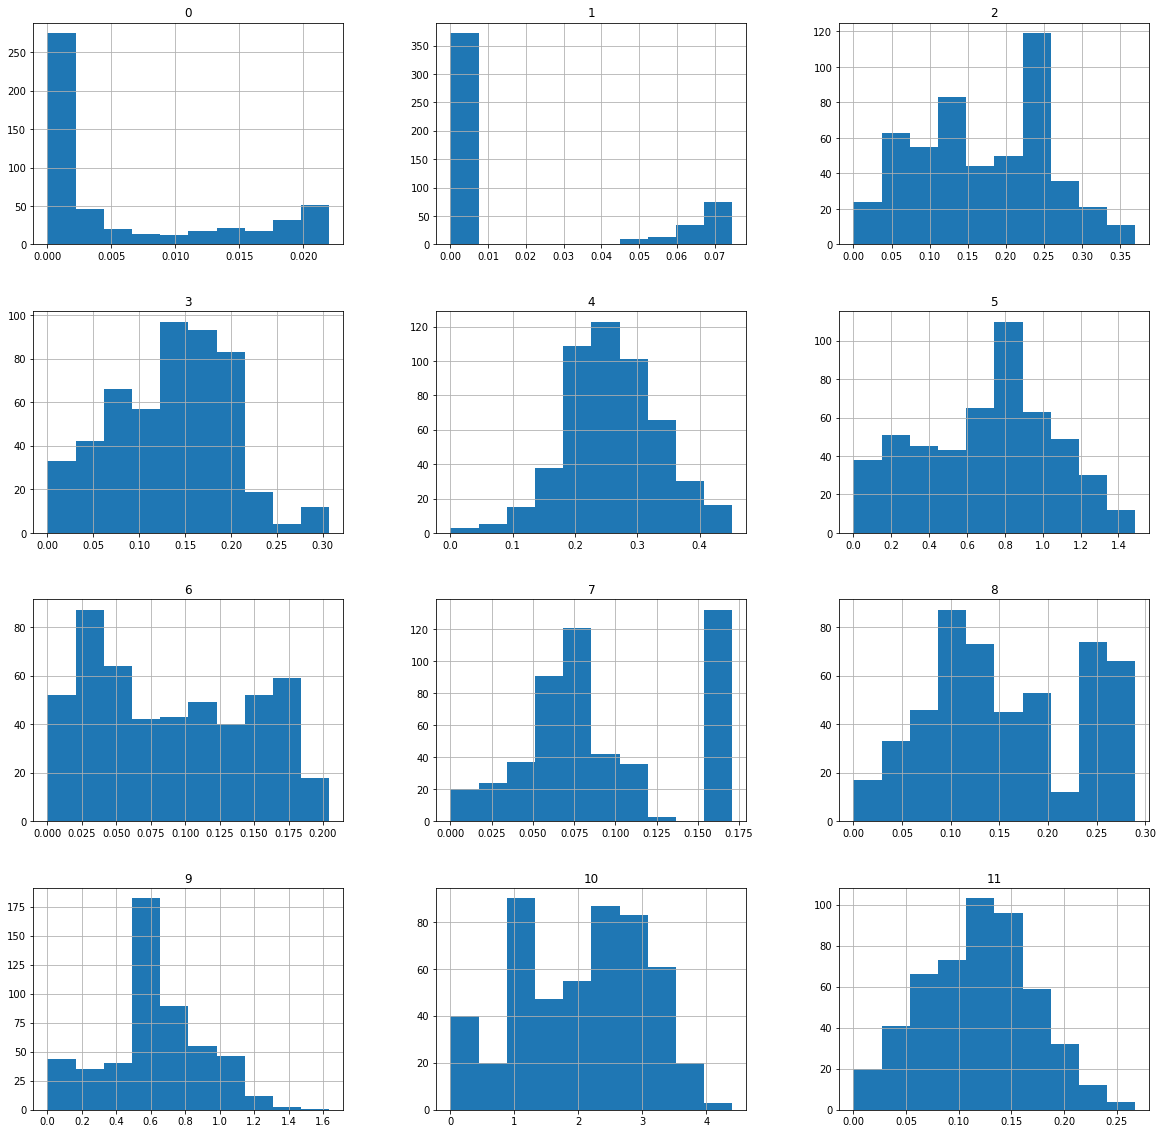

In [236]:
%matplotlib inline

X_processed.hist(figsize=(20,20))
plt.show()

In [237]:
# Split Train-Test Data

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=42)

In [238]:
# Spot Check ML Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt



ml_algorithms = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "Multi-Layer Perceptron": MLPRegressor(),
}

In [239]:
# Training the Model

results = {}
for algo_name, algo in ml_algorithms.items():
    results[algo_name] = {}
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    results[algo_name]["{}_rmse".format(algo_name)] = rmse
    results[algo_name]["predictions"] = y_pred
    print("The Accuracy for {} is {}".format(algo_name, algo.score(X_test, y_test)))
    print("The RMSE for {} is {}".format(algo_name, rmse))
    print("---------------------------------------------")

The Accuracy for Linear Regression is 0.7349415721258481
The RMSE for Linear Regression is 18.561284605522786
---------------------------------------------
The Accuracy for Decision Tree is 0.8484423460323526
The RMSE for Decision Tree is 10.613149606299213
---------------------------------------------
The Accuracy for Random Forest is 0.8633413194408907
The RMSE for Random Forest is 9.569817055118111
---------------------------------------------
The Accuracy for Support Vector Machine is 0.383180384721438
The RMSE for Support Vector Machine is 43.194115807894086
---------------------------------------------
The Accuracy for Multi-Layer Perceptron is 0.1132622933468087
The RMSE for Multi-Layer Perceptron is 62.09570876747629
---------------------------------------------


C:\Users\Lenovo\anaconda3\envs\sparta\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


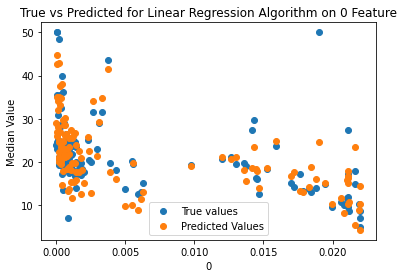

-------------------------------------------------------------------------


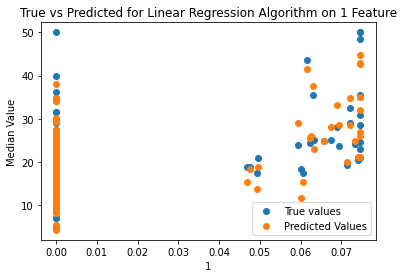

-------------------------------------------------------------------------


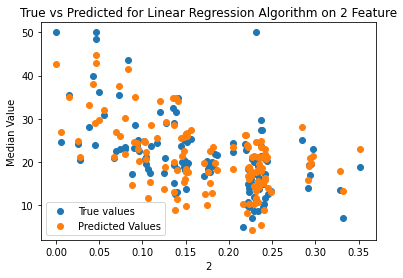

-------------------------------------------------------------------------


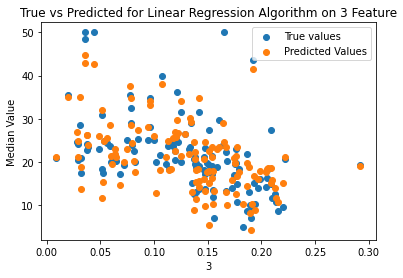

-------------------------------------------------------------------------


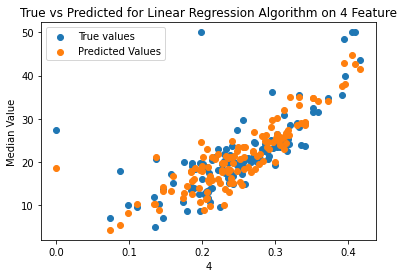

-------------------------------------------------------------------------


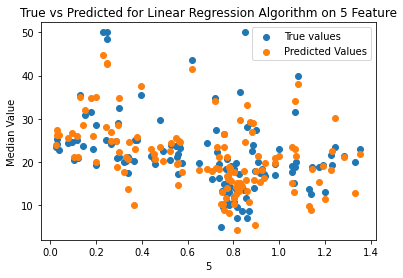

-------------------------------------------------------------------------


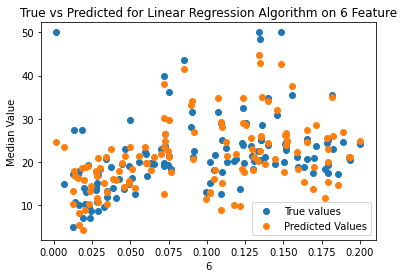

-------------------------------------------------------------------------


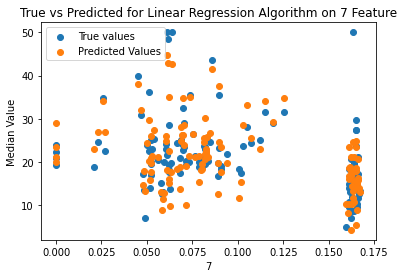

-------------------------------------------------------------------------


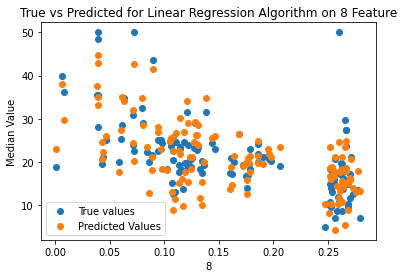

-------------------------------------------------------------------------


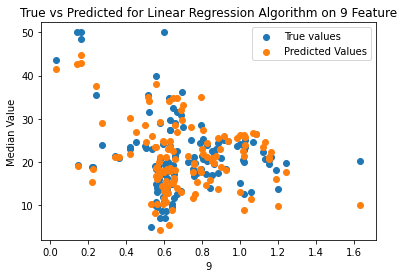

-------------------------------------------------------------------------


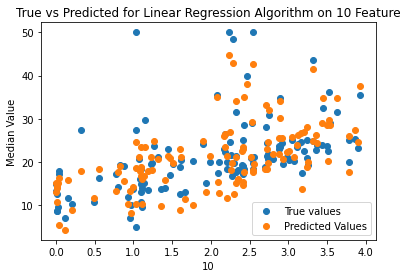

-------------------------------------------------------------------------


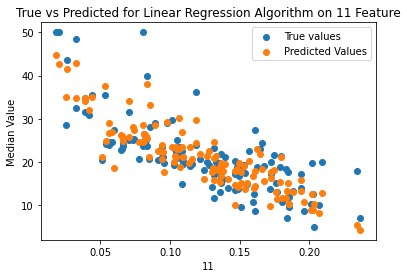

-------------------------------------------------------------------------


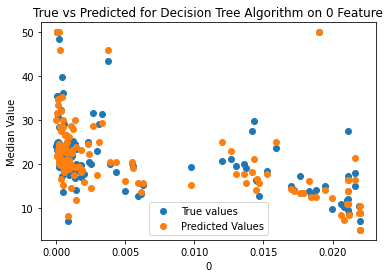

-------------------------------------------------------------------------


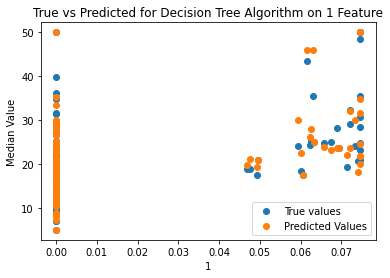

-------------------------------------------------------------------------


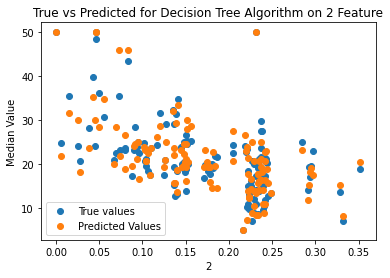

-------------------------------------------------------------------------


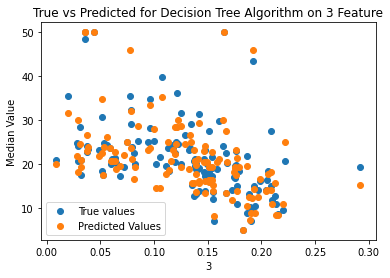

-------------------------------------------------------------------------


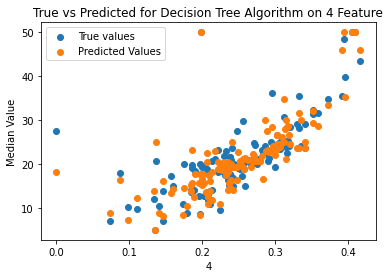

-------------------------------------------------------------------------


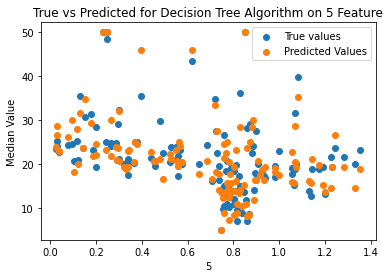

-------------------------------------------------------------------------


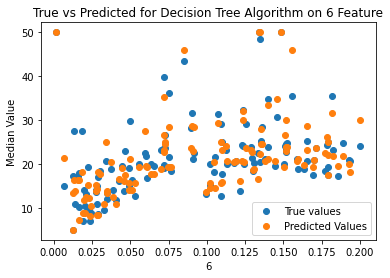

-------------------------------------------------------------------------


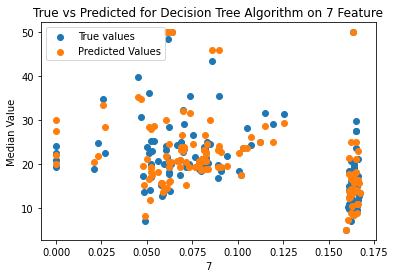

-------------------------------------------------------------------------


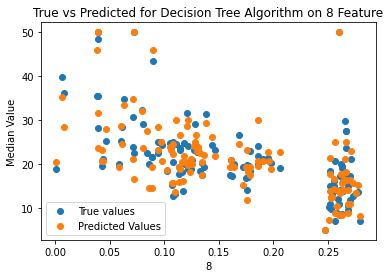

-------------------------------------------------------------------------


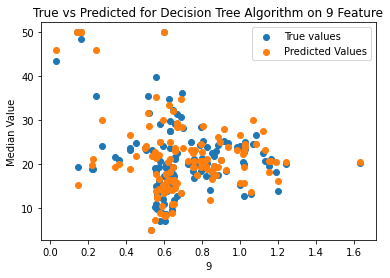

-------------------------------------------------------------------------


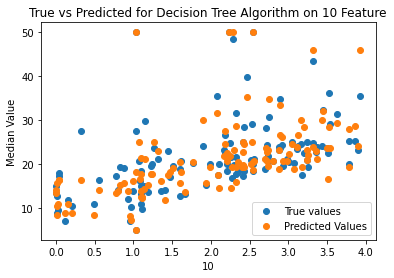

-------------------------------------------------------------------------


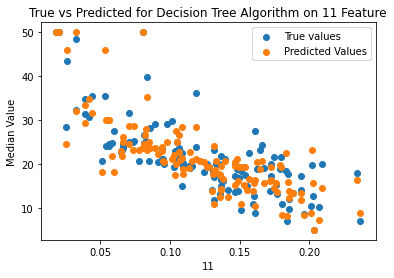

-------------------------------------------------------------------------


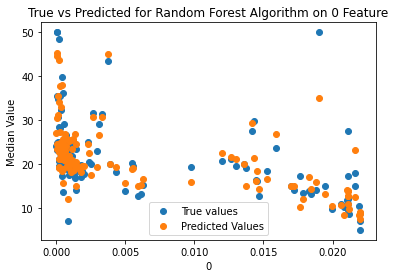

-------------------------------------------------------------------------


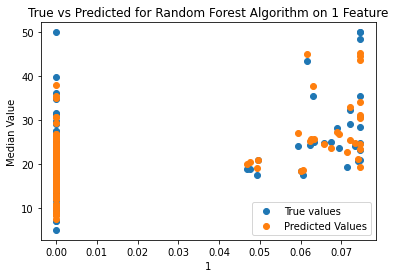

-------------------------------------------------------------------------


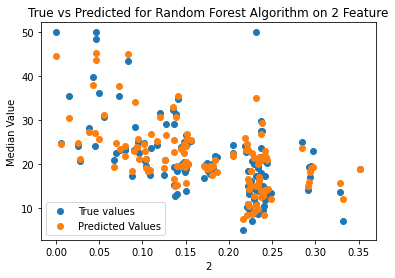

-------------------------------------------------------------------------


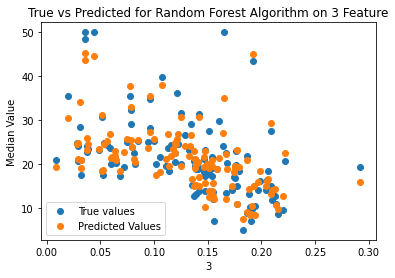

-------------------------------------------------------------------------


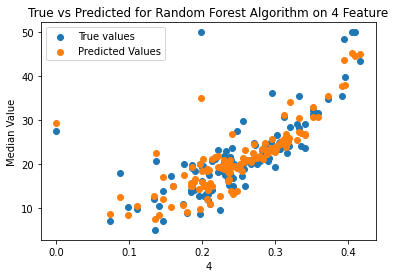

-------------------------------------------------------------------------


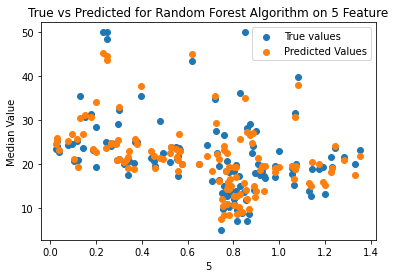

-------------------------------------------------------------------------


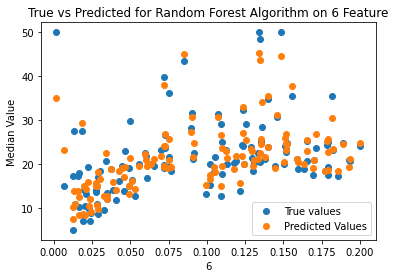

-------------------------------------------------------------------------


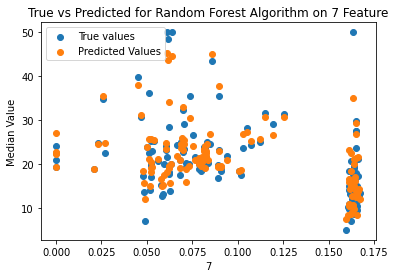

-------------------------------------------------------------------------


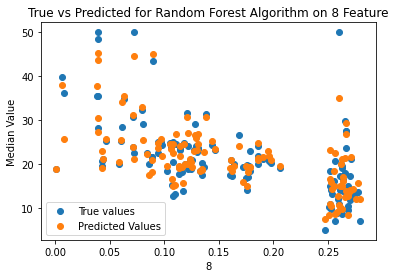

-------------------------------------------------------------------------


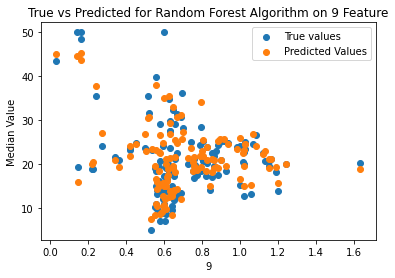

-------------------------------------------------------------------------


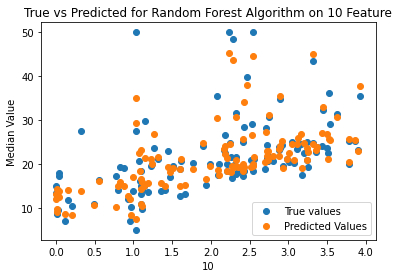

-------------------------------------------------------------------------


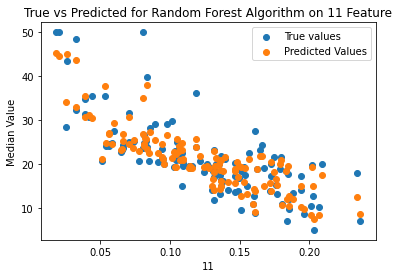

-------------------------------------------------------------------------


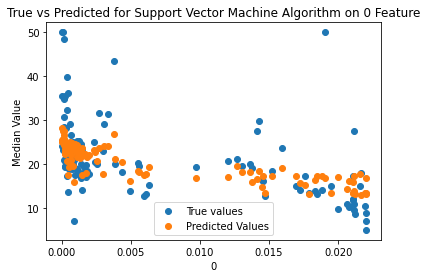

-------------------------------------------------------------------------


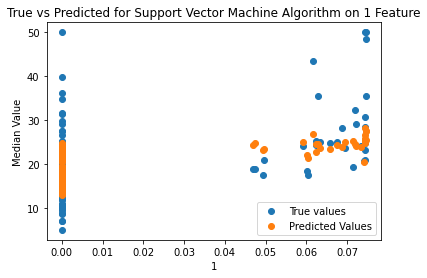

-------------------------------------------------------------------------


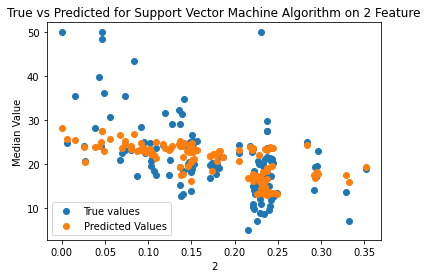

-------------------------------------------------------------------------


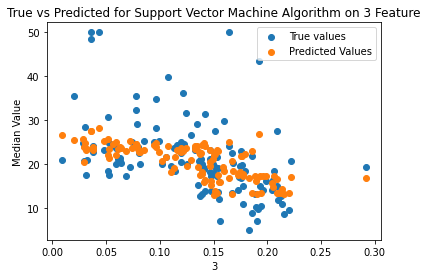

-------------------------------------------------------------------------


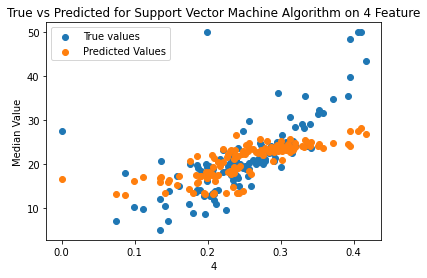

-------------------------------------------------------------------------


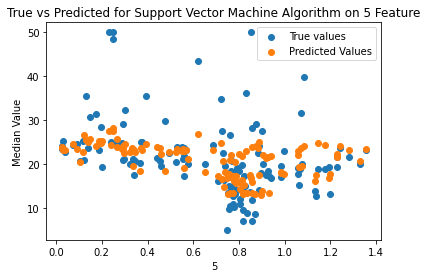

-------------------------------------------------------------------------


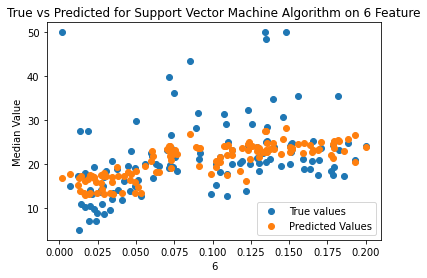

-------------------------------------------------------------------------


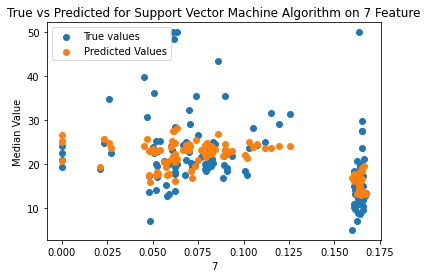

-------------------------------------------------------------------------


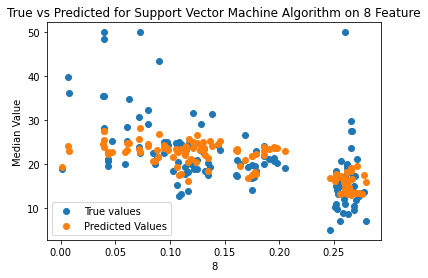

-------------------------------------------------------------------------


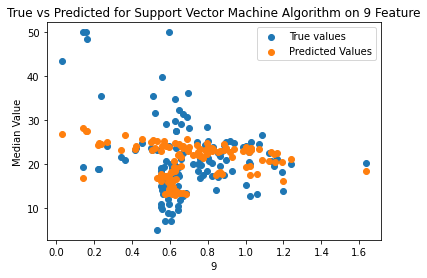

-------------------------------------------------------------------------


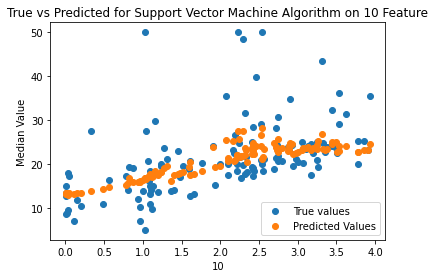

-------------------------------------------------------------------------


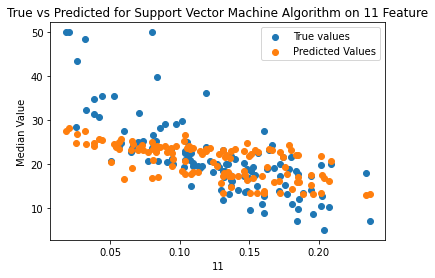

-------------------------------------------------------------------------


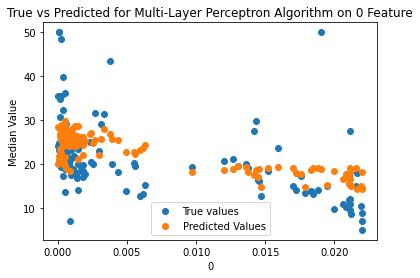

-------------------------------------------------------------------------


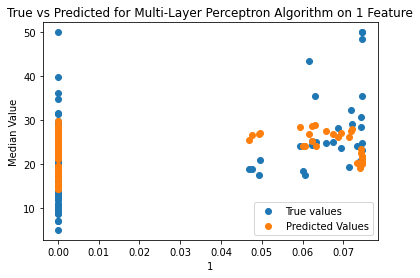

-------------------------------------------------------------------------


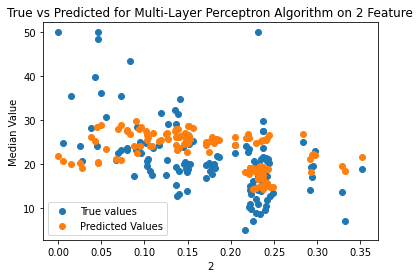

-------------------------------------------------------------------------


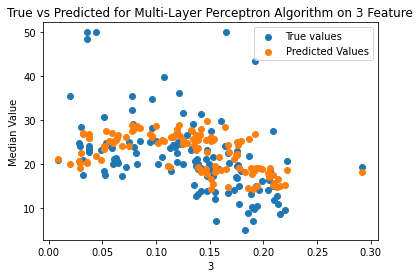

-------------------------------------------------------------------------


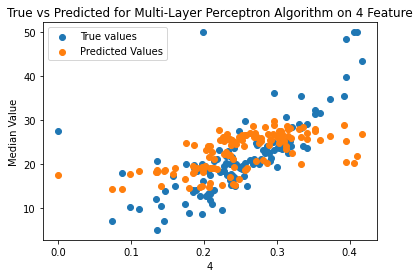

-------------------------------------------------------------------------


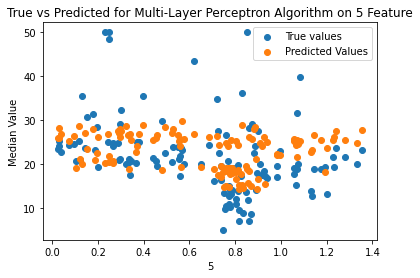

-------------------------------------------------------------------------


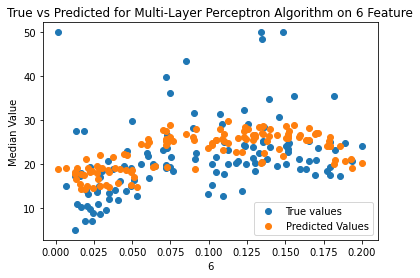

-------------------------------------------------------------------------


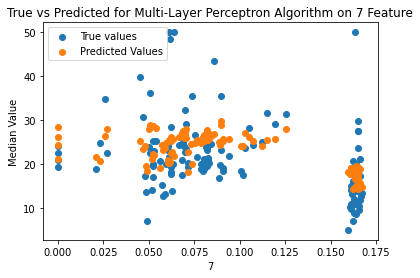

-------------------------------------------------------------------------


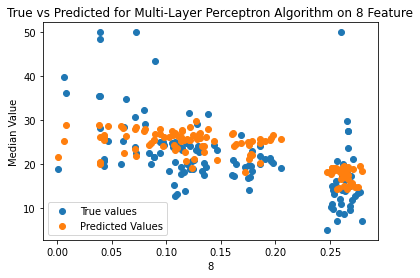

-------------------------------------------------------------------------


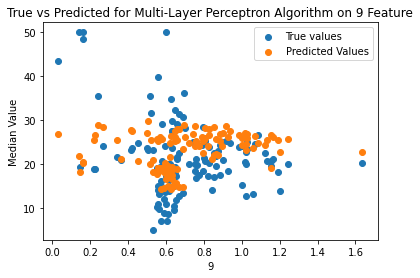

-------------------------------------------------------------------------


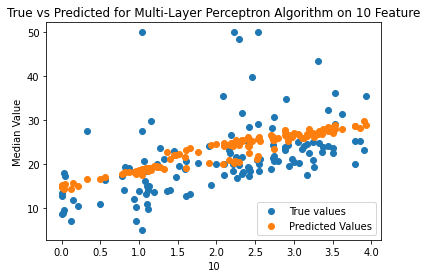

-------------------------------------------------------------------------


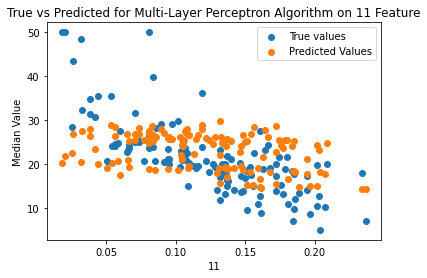

-------------------------------------------------------------------------


In [240]:
# Plotting the performance of the Algorithms

import matplotlib.pyplot as plt                    

for result in results:
    for col in X_test:
        plt.scatter(X_test[col], y_test)
        plt.scatter(X_test[col], results[result]["predictions"])
        plt.title("True vs Predicted for {} Algorithm on {} Feature".format(result, col))
        plt.xlabel(col)
        plt.ylabel("Median Value")
        plt.legend(['True values', 'Predicted Values'])    
        plt.show()
        print("-------------------------------------------------------------------------")